In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../../")
from neurotools import ns5_tools
from neurotools.utils.trigger import trigger
from neurotools.emg_tools.emg_channel import eEMG
from scipy import signal

## Generate data if it doesn't exist

In [10]:
data_file = "./source/emg_single_channel.hdf5"
overwrite = True
if not (os.path.isfile(data_file)) or overwrite:
    ns5_path = "./source/UA054_SEL_MA_GM2_0007.ns5"
    ns5_file = ns5_tools.ns5Files(ns5_path)
    used_labels = ns5_file.get_analog_entitie_labels()[0:4]
    used_labels += ['Tr0 ', 'Tr1 ']
    ns5_file.to_hdf(data_file,used_labels)
df_emg = pd.read_hdf(data_file)

## Plot raw signals

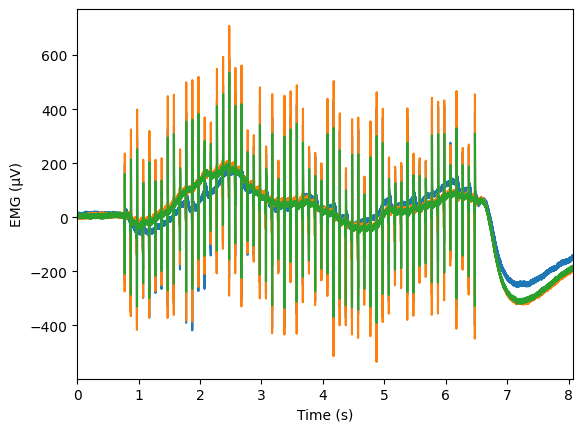

In [11]:
t = np.array(df_emg['time'])
emg_1 = eEMG(df_emg['raw 1'],t)
emg_2 = eEMG(df_emg['raw 2'],t)
emg_3 = eEMG(df_emg['raw 3'],t)

fig, ax = plt.subplots() 
emg_1.plot_raw(ax)
emg_2.plot_raw(ax)
emg_3.plot_raw(ax)

## Apply HPF to the data

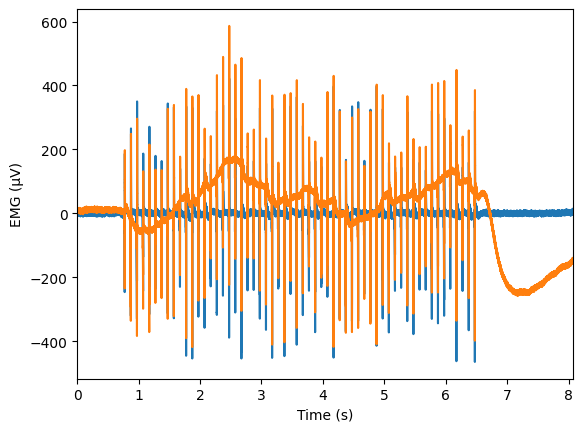

In [12]:
f_HPF = 5
o_HFP = 5
emg_1.HPF(f_HPF,o_HFP)

fig, ax = plt.subplots() 
emg_1.plot(ax)
emg_1.plot_raw(ax)


## Apply LFP

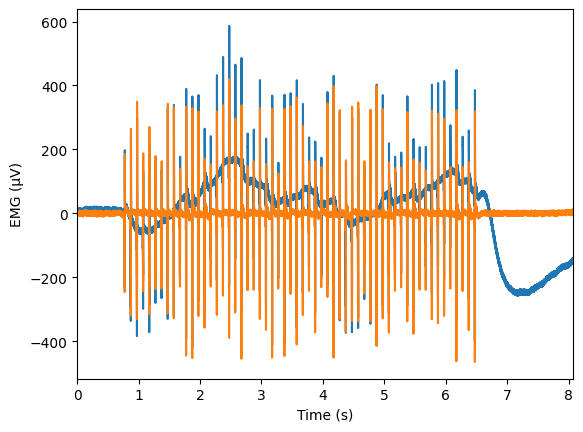

In [13]:
f_LPF = 10_000
o_LFP = 5
emg_1.LPF(f_LPF,o_LFP)

fig, ax = plt.subplots() 
emg_1.plot_raw(ax)
emg_1.plot(ax)


## Process Triggers

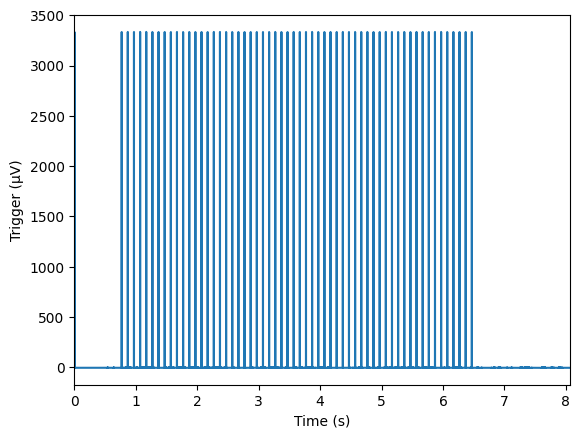

In [14]:
trigger = trigger(df_emg['Tr0 '],t)
fig, ax = plt.subplots() 
trigger.plot_raw(ax)

(1.0, 1.02)

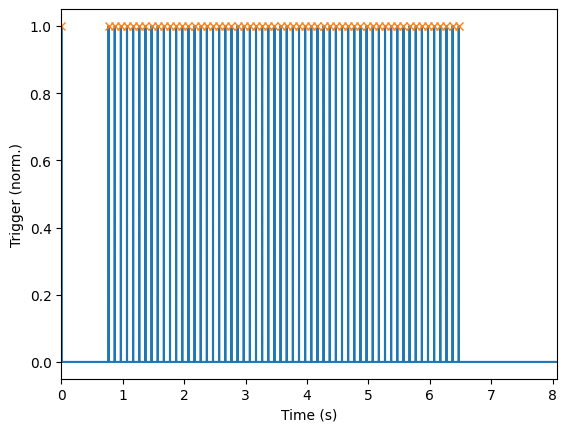

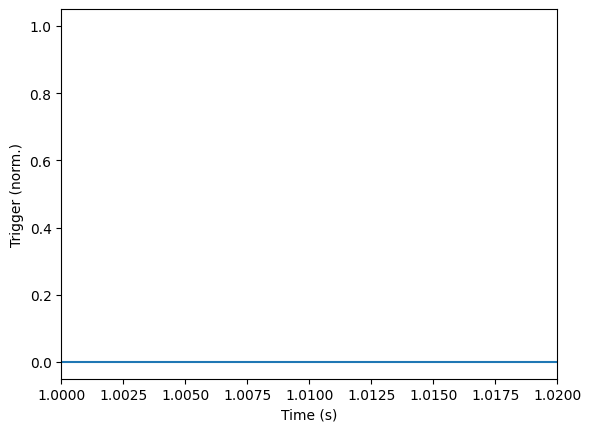

In [15]:

tr_start_idx, tr_start,_ = trigger.get_events()

fig, ax = plt.subplots() 
trigger.plot_normalized(ax)
ax.plot(t[tr_start_idx], tr_start, "x")

##zoom 
fig, ax = plt.subplots() 
trigger.plot_normalized(ax)
ax.plot(t[tr_start_idx], tr_start, "x")
ax.set_xlim(1,1.02)


## Get trigger period sample index

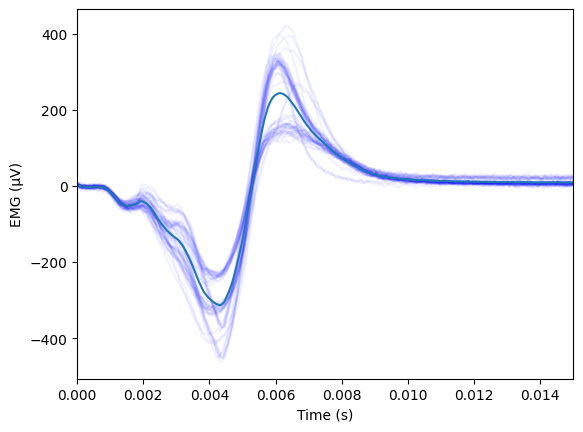

In [16]:

emg_1.trigger = trigger

emg_1.get_eCMAPS(0.015,0.0005)


fig, ax = plt.subplots() 


emg_1.plot_eCMAPS(ax,color = 'b', alpha = 0.05)
emg_1.plot_avg_eCMAP(ax)
